In [1]:
### Step 1: Imports & load dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset (GA4_synthetic_data)

In [4]:
df=pd.read_csv("GA4_synthetic_data.csv")

In [6]:
df.head(100)

,event_date,event_name,user_id,session_id,device_category,country,page_location,engagement_time_msec,item_revenue,traffic_source
0,20240101,click,84327,749914,tablet,Canada,/about,20062,260.48,organic
1,20240101,purchase,97911,910692,desktop,UK,/about,20648,276.12,direct
2,20240101,session_start,98147,814967,mobile,USA,/about,4751,43.17,paid
3,20240101,purchase,17833,161852,desktop,Canada,/contact,3056,203.71,paid
4,20240101,purchase,57013,128380,tablet,USA,/checkout,38649,259.89,paid
...,...,...,...,...,...,...,...,...,...,...
95,20240101,click,18572,284616,mobile,India,/contact,38290,481.43,referral
96,20240101,click,38225,584948,tablet,Australia,/product,25103,392.65,paid
97,20240101,purchase,55853,726264,desktop,Australia,/product,19572,311.55,referral
98,20240101,page_view,59390,669385,desktop,Australia,/product,4276,248.77,organic


In [9]:
### Step 2: Explore schema and info  [This tells you the number of rows, columns, data types, and if any column has missing values.]

In [10]:
print("Data shape:",df.shape)
print("\n Column types:\n ", df.dtypes) 
print("\n Missing Values:\n", df.isnull().sum())

Data shape: (10000, 10)

 Column types:
  event_date                int64
event_name               object
user_id                   int64
session_id                int64
device_category          object
country                  object
page_location            object
engagement_time_msec      int64
item_revenue            float64
traffic_source           object
dtype: object

 Missing Values:
 event_date              0
event_name              0
user_id                 0
session_id              0
device_category         0
country                 0
page_location           0
engagement_time_msec    0
item_revenue            0
traffic_source          0
dtype: int64


In [ ]:
### Step 3: Quick summary statistics

In [17]:
df.describe(include='all')

,event_date,event_name,user_id,session_id,device_category,country,page_location,engagement_time_msec,item_revenue,traffic_source
count,1.000000e+04,10000,10000.000000,10000.000000,10000,10000,10000,10000.000000,10000.000000,10000
unique,NaN,6,NaN,NaN,3,5,5,NaN,NaN,4
top,NaN,scroll,NaN,NaN,mobile,Canada,/contact,NaN,NaN,paid
freq,NaN,1692,NaN,NaN,3407,2055,2049,NaN,NaN,2537
mean,2.024010e+07,NaN,54755.796300,549155.302600,NaN,NaN,NaN,24914.005600,251.331532,NaN
std,1.989930e+00,NaN,26365.826245,261676.829283,NaN,NaN,NaN,14400.727681,143.632821,NaN
min,2.024010e+07,NaN,10002.000000,100056.000000,NaN,NaN,NaN,104.000000,0.000000,NaN
25%,2.024010e+07,NaN,31648.250000,321500.000000,NaN,NaN,NaN,12452.000000,128.260000,NaN
50%,2.024010e+07,NaN,54717.000000,552650.000000,NaN,NaN,NaN,24921.500000,253.775000,NaN
75%,2.024011e+07,NaN,77936.500000,773602.000000,NaN,NaN,NaN,37271.250000,374.882500,NaN


In [18]:
### Step 4: Feature engineering

In [20]:
# Convert to datetime

In [21]:
df['event_date'] = pd.to_datetime(df['event_date'],format='%Y%m%d')

In [22]:
df['event_date']

0      2024-01-01
1      2024-01-01
2      2024-01-01
3      2024-01-01
4      2024-01-01
          ...    
9995   2024-01-07
9996   2024-01-07
9997   2024-01-07
9998   2024-01-07
9999   2024-01-07
Name: event_date, Length: 10000, dtype: datetime64[ns]

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df=pd.read_csv("GA4_synthetic_data.csv")

In [17]:
# Rename for easier amnalysis

In [18]:
df.rename(columns={'item_revenue': 'Revenue'}, inplace=True)

In [19]:
df.head()

,event_date,event_name,user_id,session_id,device_category,country,page_location,engagement_time_msec,Revenue,traffic_source
0,20240101,click,84327,749914,tablet,Canada,/about,20062,260.48,organic
1,20240101,purchase,97911,910692,desktop,UK,/about,20648,276.12,direct
2,20240101,session_start,98147,814967,mobile,USA,/about,4751,43.17,paid
3,20240101,purchase,17833,161852,desktop,Canada,/contact,3056,203.71,paid
4,20240101,purchase,57013,128380,tablet,USA,/checkout,38649,259.89,paid


In [20]:
# convert ms to seconds

In [23]:
df['engagement_time_sec']=df['engagement_time_msec'] / 1000
df.drop(columns=['engagement_time_msec'], inplace=True)

In [24]:
df.head()

,event_date,event_name,user_id,session_id,device_category,country,page_location,Revenue,traffic_source,engagement_time_sec
0,20240101,click,84327,749914,tablet,Canada,/about,260.48,organic,20.062
1,20240101,purchase,97911,910692,desktop,UK,/about,276.12,direct,20.648
2,20240101,session_start,98147,814967,mobile,USA,/about,43.17,paid,4.751
3,20240101,purchase,17833,161852,desktop,Canada,/contact,203.71,paid,3.056
4,20240101,purchase,57013,128380,tablet,USA,/checkout,259.89,paid,38.649


In [25]:
# create month and weekday for time-based analysis

In [29]:
df['event_date'] = pd.to_datetime(df['event_date'],format='%Y%m%d')

In [32]:
df['month']= df['event_date'].dt.month
df['weekday']= df['event_date'].dt.day_name()

df.head()

,event_date,event_name,user_id,session_id,device_category,country,page_location,Revenue,traffic_source,engagement_time_sec,month,weekday
0,2024-01-01,click,84327,749914,tablet,Canada,/about,260.48,organic,20.062,1,Monday
1,2024-01-01,purchase,97911,910692,desktop,UK,/about,276.12,direct,20.648,1,Monday
2,2024-01-01,session_start,98147,814967,mobile,USA,/about,43.17,paid,4.751,1,Monday
3,2024-01-01,purchase,17833,161852,desktop,Canada,/contact,203.71,paid,3.056,1,Monday
4,2024-01-01,purchase,57013,128380,tablet,USA,/checkout,259.89,paid,38.649,1,Monday


In [34]:
### Step 5: Analyze categorical columns [This helps you understand which events/devices/pages are most common.]

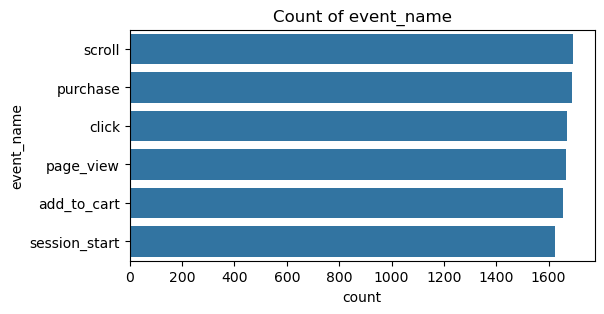

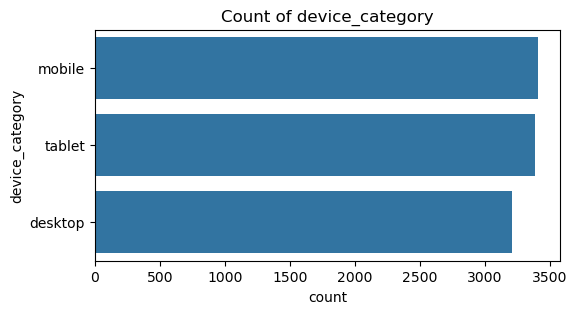

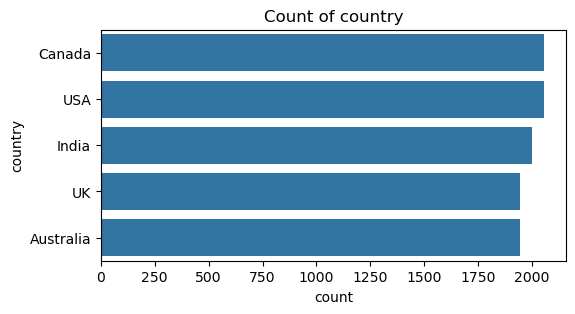

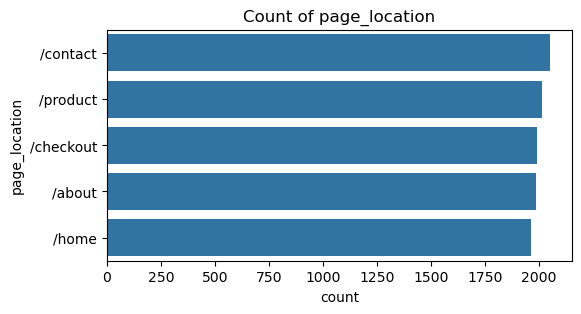

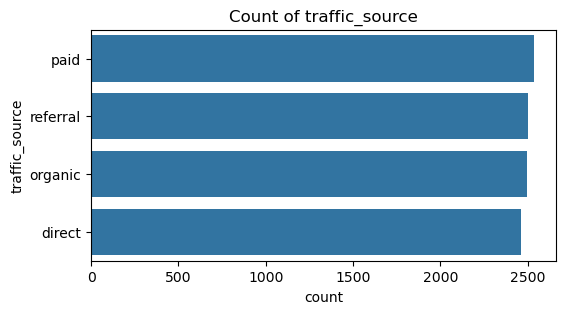

In [38]:
cat_cols = ['event_name','device_category','country','page_location','traffic_source'] # These are columns where values repeat (strings/categories).

for cols in cat_cols:     # Runs the same plotting code for every column.
    plt.figure(figsize = (6,3)) 
               # Makes a new plot (6x3 size).
               # Prevents overlapping plots.
    sns.countplot(y=df[cols], order= df[cols].value_counts().index) 
              ## y=df[cols] → horizontal bar chart
              ## value_counts().index → sorts bars by highest count
              ## Shows how many times each category appears
    plt.title(f"Count of {cols}")
    plt.show()
    

In [39]:
### Step 6: Analyze numerical columns

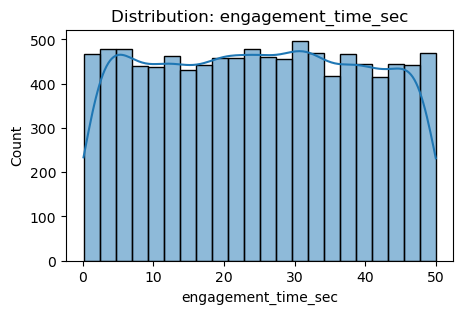

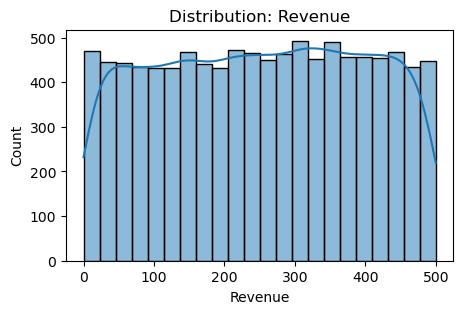

In [42]:
num_cols= ['engagement_time_sec','Revenue']

for cols in num_cols:
    plt.figure(figsize=(5,3))
    sns.histplot(df[cols], kde= True)
    plt.title(f'Distribution: {cols}')
    plt.show()

In [44]:
### Step: 7 Correlation  [This shows relationships, e.g., does longer engagement = higher revenue?]

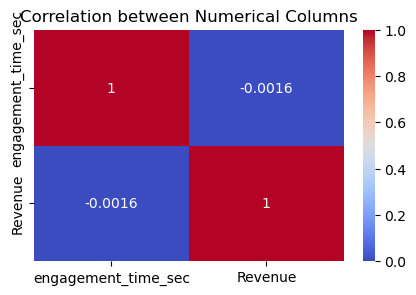

In [50]:
plt.figure(figsize=(5,3))
sns.heatmap(df[['engagement_time_sec','Revenue']].corr(), annot=True,cmap='coolwarm')
plt.title("Correlation between Numerical Columns")
plt.show()

In [51]:
## Notes: Correlation measures how two numbers move together:
#              +1 → Perfect positive relationship (increase together)
#              -1 → Perfect negative relationship (one goes up, the other goes down)
#               0 → No relationship
#     Your value -0.0016 ≈ 0 → No relationship.

In [52]:
### Step: 8 Time based Analysis

In [53]:
# Event per day

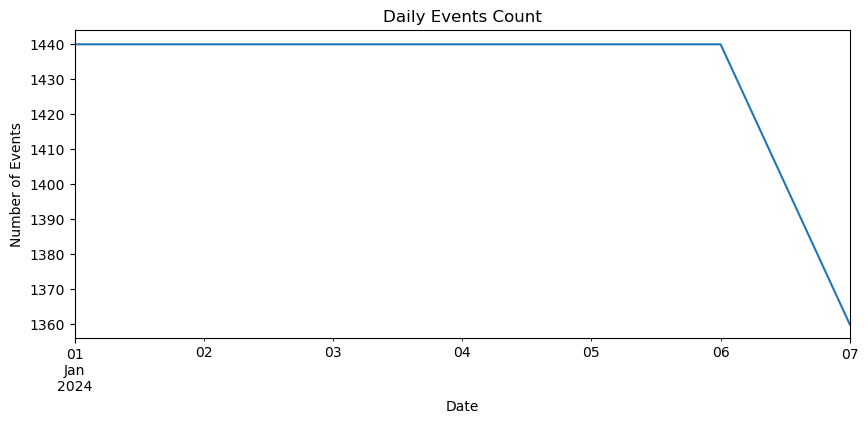

In [56]:
daily_events = df.groupby('event_date')['event_name'].count()
plt.figure(figsize=(10,4))
daily_events.plot()
plt.title("Daily Events Count")
plt.ylabel("Number of Events")
plt.xlabel("Date")
plt.show()

In [57]:
df.head()

,event_date,event_name,user_id,session_id,device_category,country,page_location,Revenue,traffic_source,engagement_time_sec,month,weekday
0,2024-01-01,click,84327,749914,tablet,Canada,/about,260.48,organic,20.062,1,Monday
1,2024-01-01,purchase,97911,910692,desktop,UK,/about,276.12,direct,20.648,1,Monday
2,2024-01-01,session_start,98147,814967,mobile,USA,/about,43.17,paid,4.751,1,Monday
3,2024-01-01,purchase,17833,161852,desktop,Canada,/contact,203.71,paid,3.056,1,Monday
4,2024-01-01,purchase,57013,128380,tablet,USA,/checkout,259.89,paid,38.649,1,Monday


In [58]:
## Daily revenue

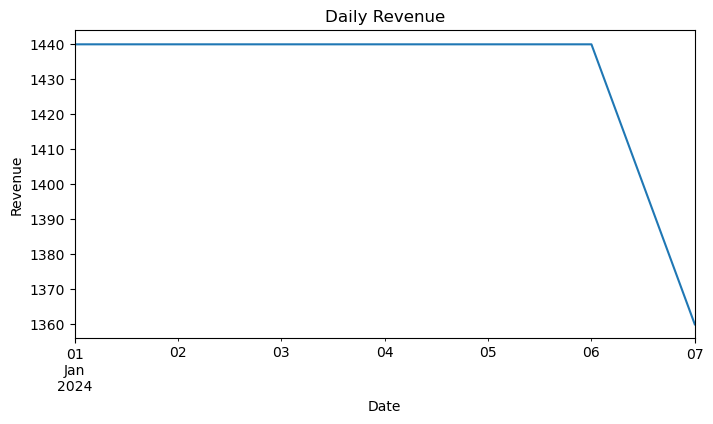

In [59]:
daily_revenue = df.groupby('event_date')['Revenue'].sum()
plt.figure(figsize=(8,4))
daily_events.plot()
plt.title("Daily Revenue")
plt.ylabel("Revenue")
plt.xlabel("Date")
plt.show()

In [60]:
### Step 9: Rule-based Insights

In [61]:
##  Simple automatic insights

In [62]:
insights= []

In [63]:
## Most popular events

In [82]:
top_event= df['event_name'].value_counts().idxmax()
insights.append(f"Most common event : {top_event}")

In [83]:
top_event

'scroll'

In [84]:
## Top device

In [85]:
top_device = df['device_category'].value_counts().idxmax()
insights.append(f"Most users are on: {top_device}")

In [86]:
top_device

'mobile'

In [87]:
## Top country

In [88]:
top_country = df['country'].value_counts().idxmax()
insights.append(f"Most events from country: {top_country}")

In [89]:
top_country

'Canada'

In [90]:
# Highest revenue Day

In [91]:
max_revenue_day = daily_revenue.idxmax()
insights.append(f"Highest revenue day: {max_revenue_day.date()} (${daily_revenue.max():.2f})")

In [92]:
max_revenue_day

Timestamp('2024-01-02 00:00:00')

In [93]:
#Average engagement time

In [94]:
avg_engagement = df['engagement_time_sec'].mean()
insights.append(f"Average engagement time per event: {avg_engagement:.2f} sec")


In [95]:
avg_engagement

np.float64(24.9140056)

In [100]:
# Print insights

In [101]:
print("AUTO INSIGHTS:")
for i in insights:
    print("•", i)

AUTO INSIGHTS:
•  Most common event : scroll
• Most users are on: mobile
• Most events from country: Canada
• Highest revenue day: 2024-01-02 ($372278.17)
• Average engagement time per event: 24.91 sec
• Most common event : scroll
• Most users are on: mobile
• Most events from country: Canada
• Highest revenue day: 2024-01-02 ($372278.17)
• Average engagement time per event: 24.91 sec


In [102]:
### Step: 10 Grouping / Pivot Table Analysis

In [103]:
# Revenue by device and event

In [104]:
pivot = df.pivot_table(values='Revenue', index='device_category', columns='event_name', aggfunc='sum', fill_value=0)
pivot

event_name,add_to_cart,click,page_view,purchase,scroll,session_start
device_category,,,,,,
desktop,132087.33,126049.43,124968.66,139266.18,151305.64,125183.09
mobile,151655.64,139392.04,146814.01,139724.95,149064.59,144768.19
tablet,136925.21,151759.23,141306.79,144135.85,136204.62,132703.87
